In [57]:
#Netflix is known for its work in data science, AI, and ML, particularly for building strong recommendation
#models and algorithms that understand customer behavior and patterns. Suppose you are working in a data-driven
#job role, and you have a dataset of more than 9,000 movies. You need to solve the following questions to help the
#company make informed business decisions accordingly:
#1. What is the most frequent genre of movies released on Netflix?
#2. Which has highest votes in vote avg column?
#3. What movie got the highest popularity? what's its genre?
#4. What movie got the lowest popularity? what's its genre?
#5. Which year has the most filmed movies

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df = pd.read_csv('/content/mymoviedb (1).csv', engine='python')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [60]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [61]:
df.info() # there is not null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [62]:
# to know thw duplicate in the data
df.duplicated().sum()


np.int64(0)

In [63]:
df.describe() # to see the mean , sdand min or max etc

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [64]:
#Exploration Summary
#we have a dataframe consisting of 9827 rows and 9 columns.
#our dataset looks a bit tidy with no NaNs nor dalicated values.
#Release_Date column needs to be casted into date time and to extract only the year value.
#Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
#there is noticable outliers in Popularity column
#Vote_Average better be categorised for proper analysis.
#Genre column has comma saperated values and white spaces that needs to be handled and casted into category.
# remove unwanted column from the data, so the overview, poster_url, original language


In [65]:
# convert the date_time formate, coercing errors to NaT
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)

datetime64[ns]


In [66]:
# we only need the year so, delete the month and date
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('float64')

In [67]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Drop the column

In [68]:
df.drop(['Overview', 'Poster_Url', 'Original_Language'], axis=1, inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.


In [69]:
def catigorize_col (df, col, labels):
 # setting the edges to cut the column accordingly
 edges = [df[col].describe()['min'],
 df[col].describe()['25%'],
 df[col].describe()['50%'],
 df[col].describe()['75%'],
 df[col].describe()['max']]

 # Categorize column based on labels and edges
 df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
 return df

In [71]:
# exploring column
df['Vote_Average'].value_counts()

,count
Vote_Average,
6.4,435
6.3,429
6.5,427
6.8,423
6.7,420
...,...
9.2,1
1.8,1
2.4,1


In [72]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [73]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


we'd split genres into a list and then
explode our dataframe to have only one
genre per row for ezch movie

In [74]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022.0,The Batman,3827.658,1151,8.1,Crime
4,2022.0,The Batman,3827.658,1151,8.1,Mystery


In [75]:
 # casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  float64 
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  object  
 4   Vote_Average  25792 non-null  object  
 5   Genre         25792 non-null  category
dtypes: category(1), float64(2), object(3)
memory usage: 1.0+ MB


In [77]:
df.nunique()

,0
Release_Date,102
Title,9512
Popularity,8159
Vote_Count,3266
Vote_Average,74
Genre,19


DATA VISULIZATION

here, we'd use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.

In [78]:
# setting up seaborn configurations
sns.set_style('whitegrid')

Q1: What is the most frequent genre in
the dataset?

In [79]:
# showing stats. on genre column
df['Genre'].describe()

,Genre
count,25792
unique,19
top,Drama
freq,3744


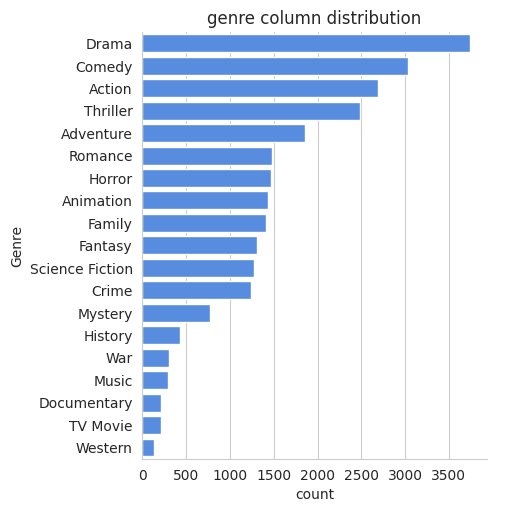

In [81]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
order = df['Genre'].value_counts().index,
color = '#4287f5')
plt.title('genre column distribution')
plt.show()

we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres.

Q2: What  has highest
genres votes ?

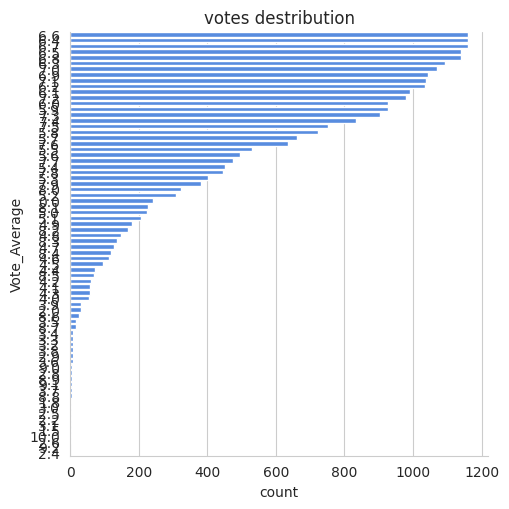

In [82]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
order = df['Vote_Average'].value_counts().index,
color = '#4287f5')
plt.title('votes destribution')
plt.show()

Q3: What movie got the highest popularity and waht's its
genre

In [83]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


Q4: What movie got the lowest popularity? what's
its genre?

In [84]:
 # checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021.0,The United States vs. Billie Holiday,13.354,152,6.7,Music
25787,2021.0,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25788,2021.0,The United States vs. Billie Holiday,13.354,152,6.7,History
25789,1984.0,Threads,13.354,186,7.8,War
25790,1984.0,Threads,13.354,186,7.8,Drama
25791,1984.0,Threads,13.354,186,7.8,Science Fiction


Q5: Which year has the most filmmed movies?

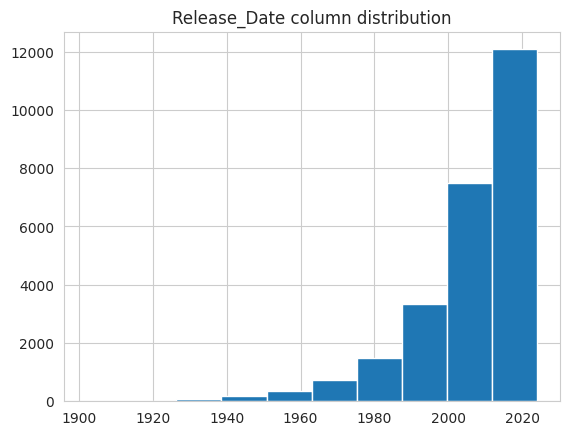

In [85]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

Q1: What is the most frequent
genre
in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
Q2: What
genres
has highest
votes
?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
Q3: What movie got the highest
Spider-Man: No Way Home
Action, Adventure
popularity
? what's its
genre
?
has the highest popularity rate in our dataset and it has
genres of
and Sience Fiction.
Q3: What movie got the lowest
popularity
? what's its
genre
?
The united states, thread' has the highest lowest rate in our dataset
and it has genres ofmusic,drama, 'war', 'sci-fi' andhistory`.
Q4: Which year has the most filmmed movies?
year
In [ ]:
2020
has the highest filmming rate in our dataset.